In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kde
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.special import erfinv
from matplotlib.colors import LogNorm

print("Hello world!")
folder="../BigDataFiles/"
inputFile=folder+"ACP80_0.dat"
inFileLabel=r"0 $\mu$rad"
cols=["gonio_angle","d0_x","d0_y","thetaIn_x","thetaOut_x","thetaIn_y","thetaOut_y","unknown1","unknown2"]

Hello world!


In [2]:
dataset = pd.read_csv(inputFile,header=None,names=cols)
print(dataset.iloc[0,:])


gonio_angle    1.570840e+06
d0_x          -3.350927e+00
d0_y          -4.145363e+00
thetaIn_x     -7.165990e-05
thetaOut_x    -6.695280e-05
thetaIn_y     -8.581489e-05
thetaOut_y    -6.698722e-05
unknown1       0.000000e+00
unknown2       0.000000e+00
Name: 0, dtype: float64


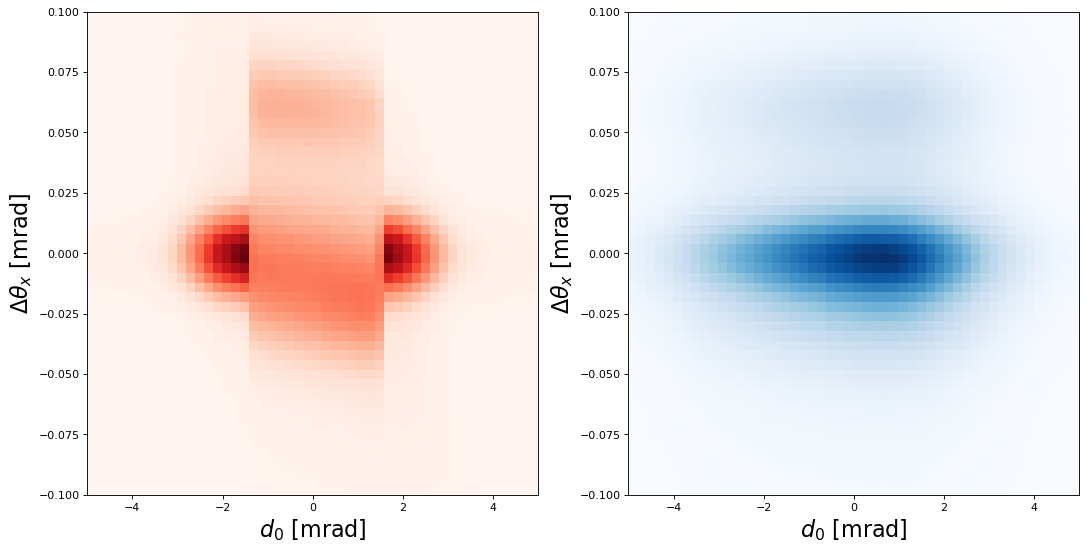

In [3]:
nbins=100
fig = plt.figure(num=None, figsize=(8*2, 8), dpi=80, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,1)
plt.hist2d(dataset["d0_x"], (dataset["thetaOut_x"]-dataset["thetaIn_x"])*1000, bins=(50, 50),range=[[-5.,5.],[-0.1,0.1]],  cmap="Reds")
plt.xlabel(r"$d_0$ [mrad]",fontsize='20')
plt.ylabel(r"$\Delta\theta_x$ [mrad]",fontsize='20')
ax2 = plt.subplot(1,2,2)
plt.hist2d(dataset["d0_y"], (dataset["thetaOut_x"]-dataset["thetaIn_x"])*1000, bins=(50, 50),range=[[-5.,5.],[-0.1,0.1]],  cmap="Blues")
plt.xlabel(r"$d_0$ [mrad]",fontsize='20')
plt.ylabel(r"$\Delta\theta_x$ [mrad]",fontsize='20')
plt.show()

In [4]:
applyCut = True
applyWeight = False
saveDataFiltered=True

max_d0x = 1.5
max_d0y = 1.5
#max_thetaInx = 0.015

In [5]:
if applyCut:
    #apply whatever selection you need
    dataset = dataset[abs(dataset.d0_x)<max_d0x]
    dataset = dataset[abs(dataset.d0_y)<max_d0y]
    #dataset = dataset[abs(dataset.thetaIn_x)<max_thetaInx]

In [6]:
outputFile=inputFile.replace(".dat","_flt.dat")
if saveDataFiltered:
    dataset.to_csv(outputFile,header=None,index=None)